#Capstone Project on Image Classification - Fashion Industry

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

### Data Set -
Domain: Image classification
Data: https://keras.io/api/datasets/fashion_mnist/


Label	Description
0:	T-shirt/top

1:	Trouser

2:	Pullover

3:	Dress

4:	Coat

5:	Sandal

6:	Shirt

7:	Sneaker

8:	Bag

9:	Ankle boot



 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

##Objective

Classify the image into different classes, using the values of 784 pixels as features

## Question 1

### Collect Fashion mnist data from tf.keras.datasets 
- Check the shape of the data

In [13]:
import pandas as pd
import tensorflow as tf

#Loading the dataset into training and tests sets
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()


In [14]:
#Shape of sets
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (60000, 28, 28)
y_train:  (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000,)


### Display first 10 images along with their labels

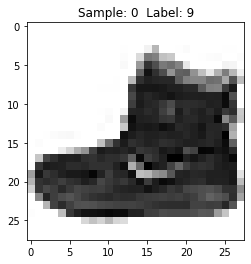

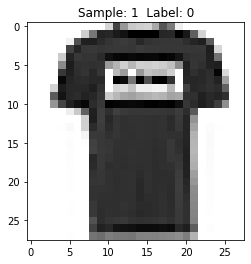

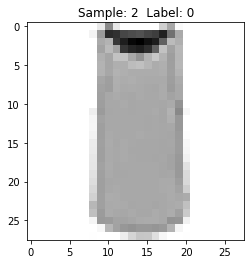

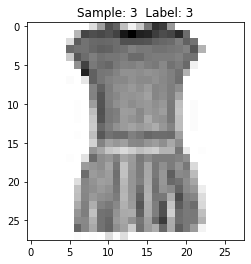

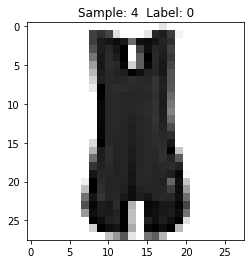

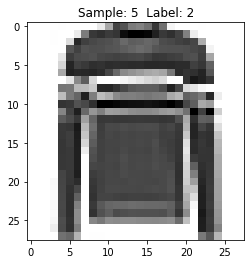

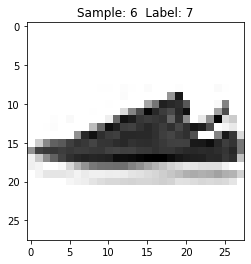

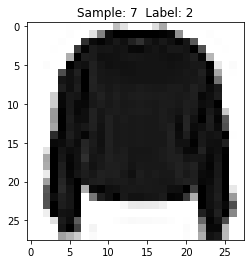

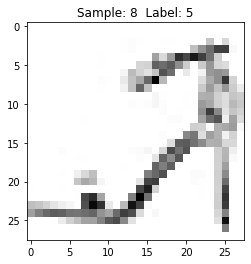

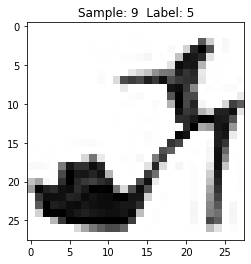

In [15]:
%matplotlib inline
#First 10 Images with their labels
import matplotlib.pyplot as plt
for num in range(0,10):
    
    #Print this sample's label 
    label = y_train[num] 
    
    #Reshape the 784 values to a 28x28 image
    image = x_train[num]
    
    # show the gray scale
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()


## Question 2

### Change train and test labels into one-hot vectors
- Check the shape of labels after one hot encoding

In [16]:
import numpy as np

num_classes = 10

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

y_train = tf.keras.utils.to_categorical(y_train,num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


In [17]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 10) (10000, 10)


### Normalize the pixel values

In [18]:
#Normalizing pixel values in float
x_train=x_train/255.0
x_test=x_test/255.0

## Question 3

### Create a Deep Neural Network Model for Classification
- Initialize a Sequential model
- Reshape the 28X28 images into 1d array with 784 features
- Add 3 hidden layer with activation relu
- Add dropout layer after each hidden layer
- Add a Dense layer with 10 neuron as output, use activation softmax

The output layer has **number of neurons = number of classes** if activation is softmax.

Softmax is used for multi-class classification
  


### Initialize model and reshape the data for the input layer

In [19]:
from keras.layers import Dense,Input,Dropout

#Reshaping 28x28 into 784 features of 1 array
num_features = 784
x_train = tf.reshape(x_train,[-1,num_features])
x_test = tf.reshape(x_test,[-1,num_features])

#Initialization of Model and input layer
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(num_features,)))


### Add hidden layers
- Add 3 fully-connected layers with 300, 200, and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.15` after each hidden layer

In [20]:
#3 Hidden layers with required specifications
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.15))


### Add the output layer 
- Use a fully connected layer with 10 neurons with `softmax` activation.
- Use `categorical_crossentropy` loss 
- Use `adam` optimizer with learning rate = 0.002 and train the network. 

### Also add callback, 
- such that if validation loss doesn't decreases consecutively 2 times, stop the training

In [21]:
from keras.callbacks import EarlyStopping

#Outer Layer with 10 neurons for 10 outputs
model.add(Dense(10,activation='softmax'))

#Model compilation using Adam optimizer and categorical_crossentropy
opt = tf.keras.optimizers.Adam(learning_rate=0.002)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

#Callback to stop epochs for said condition
stop_here = EarlyStopping(patience=2)

### Print model summary

In [22]:
#Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               60200     
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               20100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 10)               

## Question 4

###Train your model, use test data as validation set
- epochs = 20
- batch size = 32

In [23]:
#Training Model
history = model.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_test,y_test),shuffle=True)

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5559 - accuracy: 0.7990 - val_loss: 0.4645 - val_accuracy: 0.8319
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4362 - accuracy: 0.8423 - val_loss: 0.4089 - val_accuracy: 0.8541
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4044 - accuracy: 0.8562 - val_loss: 0.4027 - val_accuracy: 0.8552
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3833 - accuracy: 0.8626 - val_loss: 0.3766 - val_accuracy: 0.8650
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3727 - accuracy: 0.8660 - val_loss: 0.4003 - val_accuracy: 0.8605
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3593 - accuracy: 0.8703 - val_loss: 0.3726 - val_accuracy: 0.8718
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3513 - accuracy: 0.8721 - val_loss: 0.3684 - val_accuracy:

### Evaluate the model on the test data

In [24]:
score = model.evaluate(x_test,y_test,verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3647908568382263
Test accuracy: 0.880299985408783


## Question 5

###Predict Labels of test data

In [25]:
y_pred= model.predict(x_test)
y_pred

array([[1.3649205e-13, 3.4128298e-15, 9.4117636e-17, ..., 3.4147798e-04,
        7.7537116e-10, 9.9964809e-01],
       [6.4450924e-06, 3.5540462e-14, 9.9952400e-01, ..., 3.1614008e-26,
        9.3240910e-12, 4.6281187e-31],
       [8.9872954e-23, 1.0000000e+00, 3.2098906e-30, ..., 0.0000000e+00,
        5.0013486e-36, 0.0000000e+00],
       ...,
       [3.1777156e-06, 1.0363660e-15, 5.4042513e-09, ..., 2.7365864e-19,
        9.9999189e-01, 1.9710648e-21],
       [3.7504394e-22, 1.0000000e+00, 2.8541328e-28, ..., 0.0000000e+00,
        6.5332618e-32, 0.0000000e+00],
       [4.7018713e-17, 1.2564215e-29, 1.1730180e-22, ..., 5.1925758e-07,
        5.4064790e-16, 1.5893713e-07]], dtype=float32)

###Print Confusion matrix of test data

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_pred,y_test)

columns = ['T-Shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
pd.DataFrame(cm,columns=columns,index=columns)

,T-Shirt,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle Boot
T-Shirt,870,4,18,31,0,0,156,0,0,0
Trouser,2,969,0,2,1,0,0,0,0,0
Pullover,15,2,796,13,95,0,113,0,5,0
Dress,20,21,5,877,21,1,24,0,3,0
Coat,2,2,126,51,804,0,56,0,6,0
Sandal,1,0,0,0,0,959,0,12,2,5
Shirt,82,1,55,22,77,0,638,0,7,2
Sneaker,0,0,0,0,0,24,0,959,2,37
Bag,8,1,0,4,2,0,13,0,975,0
Ankle Boot,0,0,0,0,0,16,0,29,0,956


###Plot training accuracy vs validation accuracy
###Plot training loss vs validation loss

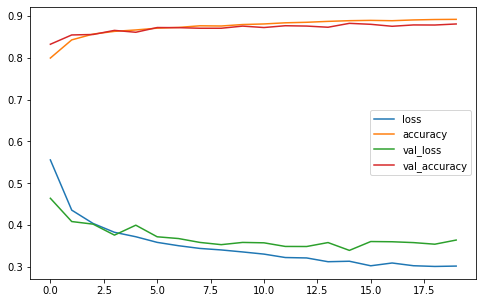

In [27]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()